In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random

In [11]:
#Random start of population
#genomes as a list of gene sequences
def initialise():
    genomes =[]
    for i in range(2):
        genomes.append([np.random.randint(2, size=6)]) # add 5 randomly initialised indiviudals
    
    return genomes

    

In [12]:
#usefull functions

def paring(mom,dad):
    return(np.concatenate((mom[:3], dad[3:]), axis=0))

def entschachteln(genos):
    print(len(genos))
    neue = [0,0]
    i = 0
    for k in genos:
        for l in k:
            print(l)
            neue[i] =l
            i = i+1

    return (neue)

def mutation(popul):
    position = random.randrange(0, len(popul))
    gencode = popul[position]
    
    decider = random.uniform(0, 1)
    posi = 0
    if decider < 0.2 :
        print('Mutation')
        posi = random.randrange(0, len(gencode))
    
        if gencode[posi] == 1:
            gencode[posi] = 0
        elif gencode[posi] == 0:
            gencode[posi] = 1
            
    popul[position] = np.array(gencode)
    
    return popul


def selected(maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-2:][::-1]
    print('Highest acc at')
    print(indices)
    parents= []
    
   
    for ind in indices:    
        parents.append(actualpop[ind])
            
   
    
    random.shuffle(parents)
    f= 0
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs

In [13]:
def netzdurchlauf(acutalpop):
    accuracy_of_population= []
    
    print('Aktuelle Population')
    print(actualpop)
    for element in actualpop:
        batch_size = 128
        num_classes = 10
        epochs = 12

        # input image dimensions
        img_rows, img_cols = 28, 28

        # the data, split between train and test sets
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        if K.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
#             print('x_train shape:', x_train.shape)
#             print(x_train.shape[0], 'train samples')
#             print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        model = Sequential()




        model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
            ########
            
            

        for gen in element:
            if (gen== 0):
                model.add(Conv2D(64, (3, 3), activation='relu'))
            elif (gen == 1):
                model.add(Dense(128, activation='relu'))




        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

        model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        accuracy_of_population.append(score[1])
        
    return (accuracy_of_population)

In [14]:

# Hauptmethode
start = time.time()


DURCHGÄNGE = 2 # variable to clarify number of generations
actualpop= initialise()
actualpop= entschachteln(actualpop)
evalaccuris = []
saved = actualpop
i = 1
    
while i < DURCHGÄNGE:
    
    nummer = i
    accuri = netzdurchlauf(actualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(accuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(accuri))
    print(actualpop)
#     actualpop = selected(accuri, actualpop)
    actualpop = mutation(actualpop)
    
    evalaccuris.append([i ,np.amax(accuri)])
    i = i+1
    
    
    
print('The highest accuracies in population')
print(evalaccuris)  

print('Wartezeit: ')
end = time.time()
seconds = end - start
minutes = seconds / 60
print(minutes)

2
[1 0 1 1 0 0]
[1 0 0 1 1 1]
Aktuelle Population
[array([1, 0, 1, 1, 0, 0]), array([1, 0, 0, 1, 1, 1])]
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 223us/step - loss: 0.2921 - acc: 0.9075 - val_loss: 0.0594 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0761 - acc: 0.9769 - val_loss: 0.0420 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 13s 211us/step - loss: 0.0542 - acc: 0.9834 - val_loss: 0.0316 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.0431 - acc: 0.9859 - val_loss: 0.0279 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 14s 233us/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0237 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0217 - val_acc: 0.9927
Epoch 7/12


(0.99, 1)

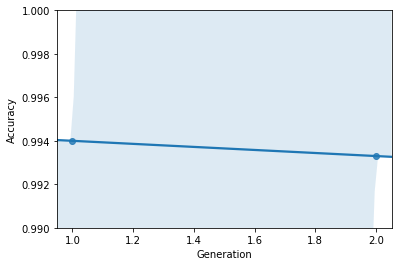

In [42]:
df = pd.DataFrame(data =evalaccuris)
df.rename(columns={0: 'Generation',1:'Accuracy'}, inplace=True)
df
sns.regplot(x=df['Generation'],y=df['Accuracy'])
plt.ylim(0.990, 1)



In [31]:

# fix schachtelung

def entschachteln(genos):
    print(len(genos))
    neue = [0,0]
    i = 0
    for k in genos:
        for l in k:
            print(l)
            neue[i] =l
            i = i+1

    return (neue)
    

actualpop= initialise()
print(actualpop)
neue = entschachteln(actualpop)
print(neue)

acc = netzdurchlauf1(neue)


[[array([1, 1, 1, 0, 0, 1])], [array([1, 1, 1, 1, 1, 0])]]
2
[1 1 1 0 0 1]
[1 1 1 1 1 0]
[array([1, 1, 1, 0, 0, 1]), array([1, 1, 1, 1, 1, 0])]
Aktuelle Population
[[array([1, 1, 1, 0, 0, 1])], [array([1, 1, 1, 1, 1, 0])]]
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 227us/step - loss: 0.2626 - acc: 0.9188 - val_loss: 0.0616 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 13s 225us/step - loss: 0.0704 - acc: 0.9784 - val_loss: 0.0406 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.0522 - acc: 0.9842 - val_loss: 0.0317 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 13s 223us/step - loss: 0.0422 - acc: 0.9870 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.0356 - acc: 0.9894 - val_loss: 0.0274 - val_acc: 0.9911
Epoch 6/12
60000/60000 [========

In [33]:
actualpop = selected2(acc, neue)
actualpop = mutation(actualpop)

Highest acc at
[0 1]
